In [59]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import distance
from scipy.stats.stats import pearsonr 

/tmp/ipykernel_1324405/218840759.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


So as to know the information about the HCP database, see below.

In [3]:
HCP_description = pd.read_csv('/neurospin/dico/adufournet/HCP_S1200_DataDictionary_Oct_30_2023.csv')
HCP_description

,fullDisplayName,category,assessment,columnHeader,description
0,Subject,Subject Information,Demographics,Subject,HCP Subject ID
1,Quarter Released,Subject Information,Demographics,Release,HCP data release in which this subject's data ...
2,Acquisition Quarter,Subject Information,Demographics,Acquisition,Quarter in which this subject's 3T and behavio...
3,Gender,Subject Information,Demographics,Gender,Gender of Subject
4,Age Range,Subject Information,Demographics,Age,"Age group of Participant, banded in five-year ..."
...,...,...,...,...,...
808,MOV4 TRfrac,7T Eye Tracker Metadata,MOV,MOV4_TRFRAC,The value of TRfrac (percentage of total scan ...
809,MOV eyetrack compl,7T Eye Tracker Metadata,MOV,MOV_EYETRACK_COMPL,TRfrac (percentage of total scan time that had...
810,REST trackfrac min,7T Eye Tracker Metadata,REST,REST_TRACKFRAC_MIN,The minimum value for Trackfrac (percentage of...
811,REST TRfrac min,7T Eye Tracker Metadata,REST,REST_TRFRAC_MIN,The minimum value for TRfrac (percentage of to...


In [4]:
HCP_info = pd.read_csv('/neurospin/dico/jchavas/RESTRICTED_jchavas_1_18_2022_3_17_51.csv')

In [5]:
HCP_IID = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/HCP_prob_pred_PCS.csv')
HCP_IID = HCP_IID['IID'].astype(int)
HCP_IID.values

array([100206, 100307, 100408, ..., 994273, 995174, 996782])

In [6]:
HCP_info = HCP_info[HCP_info['Subject'].isin(HCP_IID.values)]
HCP_info

,Subject,Age_in_Yrs,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,Race,...,SSAGA_Times_Used_Illicits,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used
1,100206,27,True,NotTwin,,56037_85858,56037,85858,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,100307,27,True,NotMZ,MZ,51488_81352,51488,81352,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,100408,33,True,MZ,MZ,51730_81594,51730,81594,NaN,White,...,4.0,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0
4,100610,27,True,NotMZ,DZ,52813_82634,52813,82634,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
5,101006,35,True,MZ,,51283_52850_81149,51283,81149,NaN,Black or African Am.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,992774,35,True,NotTwin,,51345_81210,51345,81210,NaN,White,...,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0
1202,993675,29,True,NotTwin,,55800_85621,55800,85621,NaN,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1203,994273,30,True,NotTwin,,52364_82227,52364,82227,NaN,White,...,4.0,0.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,5.0
1204,995174,25,True,MZ,MZ,55923_85743,55923,85743,NaN,White,...,5.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0


#### Test if I can access to the monozygous or dizygous twins only

In [7]:
# to get only the monozygous twins
MZ_ID = HCP_info[HCP_info['ZygosityGT'] == 'MZ']['Subject'].values
print(MZ_ID.shape)
print()
# to get the number of unique family ID
HCP_info_MZ = HCP_info[HCP_info['ZygosityGT'] == 'MZ']
print(len(HCP_info_MZ['Family_ID'].unique()))

(286,)

148


As we can see, 148*2=296, therefore it means that some twins don't have the same family ID, therefore they are considered as alone. In the best case, we are dealing with 286//2=143 pairs.

In [8]:
# to get only the dizygous twins
DZ_ID = HCP_info[HCP_info['ZygosityGT'] == 'DZ']['Subject'].values
print(DZ_ID.shape)
print()
HCP_info_DZ = HCP_info[HCP_info['ZygosityGT'] == 'DZ']
print(len(HCP_info_DZ['Family_ID'].unique()))

(170,)

91


Same here, 91*2=182, which means that some of the dizygous twins don't have the same family ID, or they are on their own.

#### Get the twin pairs depending on the Family_ID

In [9]:
list_MZ_twin_id = []

for familiy_id in HCP_info_MZ['Family_ID'].unique():
    # we start by checking if there are two twins in the same family
    if HCP_info_MZ['Family_ID'].isin([familiy_id]).sum(axis=0) == 2:
        # get the ID of the Monozygous twins that have the same family ID
        list_MZ_twin_id.append(HCP_info_MZ[HCP_info_MZ['Family_ID'].isin([familiy_id])]['Subject'].values)

len(list_MZ_twin_id)

138

In [10]:
list_DZ_twin_id = []

for familiy_id in HCP_info_DZ['Family_ID'].unique():
    # we start by checking if there are two twins in the same family
    if HCP_info_DZ['Family_ID'].isin([familiy_id]).sum(axis=0) == 2:
        # get the ID of the Monozygous twins that have the same family ID
        list_DZ_twin_id.append(HCP_info_DZ[HCP_info_DZ['Family_ID'].isin([familiy_id])]['Subject'].values)

len(list_DZ_twin_id)

79

#### Compute the correlation betwenn the predictions of having a PCS (probabilities) for the different twins

In [97]:
pred = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/HCP_prob_pred_left_PCS.csv')

In [138]:
pred0 = pred[pred['IID'].isin([id[0] for id in list_MZ_twin_id])]['Pred'].to_numpy()
pred1 = pred[pred['IID'].isin([id[1] for id in list_MZ_twin_id])]['Pred'].to_numpy()

In [137]:
print(pearsonr(pred0,pred1))

PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)


In [113]:
pred0 = pred[pred['IID'].isin([id[0] for id in list_DZ_twin_id])]['Pred'].to_numpy()
pred1 = pred[pred['IID'].isin([id[1] for id in list_DZ_twin_id])]['Pred'].to_numpy()

In [114]:
print(pearsonr(pred0,pred1))

PearsonRResult(statistic=-0.03858541274221328, pvalue=0.735654100758735)


#### Load an embedded space of dimension 256 for the left CINGULATE region from HCP

In [141]:
#embeddings_HCP = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Program/Output/2024-05-13/09-33-29_206/hcp_epoch60_embeddings/full_embeddings.csv", index_col=0)
#embeddings_HCP = pd.read_csv("/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Input/hcp_cingulate_full_embeddings.csv", index_col=0)
embeddings_HCP = pd.read_csv('/neurospin/dico/adufournet/Runs/04_Heritability_Right_PCS_HCP_dim10/Output/2024-05-16/14-59-55_124/HCP_epoch100_embeddings/full_embeddings.csv', index_col=0)

In [142]:
embeddings_HCP.loc[MZ_ID]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
100307,0.811358,-18.127650,-4.755681,22.113867,-5.715726,15.947124,9.402464,-19.022861,-13.003400,13.321704,...,6.490175,-8.862627,13.441197,2.842024,6.585532,25.127434,-6.861317,15.825949,-23.992393,-9.157214
100408,20.104237,19.609802,-11.392226,-22.513320,1.335086,-0.447604,-11.521453,-30.562178,-12.678901,13.097897,...,28.514357,-9.187751,-13.514122,-2.253131,2.700759,7.052255,-21.251228,-8.701427,-5.803285,-24.713255
102311,-32.505360,-5.200749,-12.162289,-28.955717,-4.892257,8.198012,-4.540857,-33.291904,9.211817,16.072174,...,-19.056496,6.433754,0.546124,-16.246403,-3.416265,-20.572400,6.595950,7.942719,-0.291495,13.398067
102816,-5.146794,-2.558759,16.640585,1.437285,0.510092,13.059071,-11.738085,-2.056876,-3.312110,17.245064,...,-13.187455,-11.118043,-11.984270,8.827721,13.687307,7.969702,-40.458310,9.811605,-25.338040,7.539057
103010,15.232652,2.912224,-15.154087,1.247068,15.335350,36.344677,-23.462456,-23.445454,-1.729635,16.249340,...,-17.031004,0.847113,2.316298,6.536867,-14.008108,30.577726,4.458787,8.757708,-8.228526,0.561357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951457,-1.842494,-9.691184,-11.991823,16.386200,-1.872568,-5.732822,-1.986975,-23.508482,2.238032,34.636510,...,-3.883567,-25.732310,-16.599918,15.065546,23.026081,16.945166,4.926830,-3.557057,-20.464735,-4.272741
969476,-3.018558,-10.580470,12.855820,-6.223276,-1.339707,-9.528456,6.827419,-9.118894,3.409506,11.057279,...,10.357988,-18.342953,-24.890802,-1.148929,11.417215,-9.909482,-11.515385,-3.473738,18.314955,12.930169
971160,-2.576418,-4.061260,-0.500466,-4.804957,5.877888,18.392080,7.786570,-22.648561,4.331325,-9.334187,...,31.055305,16.036123,2.450460,13.987581,-1.608823,9.074173,-37.522480,13.635156,-7.527434,-9.731142


### Calculation of the distances between the different twins

First, the monozygous twins.

In [143]:
MZ_cos_dist = []
MZ_eucli_dist = []

for twin_pair in list_MZ_twin_id:
    twin0 = twin_pair[0]
    twin1 = twin_pair[1]
    MZ_cos_dist.append((distance.pdist([embeddings_HCP.loc[twin0].values, embeddings_HCP.loc[twin1].values], 'cosine'))[0])
    MZ_eucli_dist.append(distance.pdist([embeddings_HCP.loc[twin0].values, embeddings_HCP.loc[twin1].values], 'sqeuclidean')[0])

MZ_mean_cos_dist = np.sum(MZ_cos_dist)/len(MZ_cos_dist)
MZ_mean_eucli_dist = np.sum(MZ_eucli_dist)/len(MZ_eucli_dist)

print(f'The average cosine distance for the monozygous twin in the 256 dim latent space is {MZ_mean_cos_dist}')
print(f'The average euclidean distance for the monozygous twin in the 256 dim latent space is {MZ_mean_eucli_dist}')

The average cosine distance for the monozygous twin in the 256 dim latent space is 0.5845362792749179
The average euclidean distance for the monozygous twin in the 256 dim latent space is 86404.85148904157


Then, the dizygous twins.

In [144]:
DZ_cos_dist = []
DZ_eucli_dist = []

for twin_pair in list_DZ_twin_id:
    twin0 = twin_pair[0]
    twin1 = twin_pair[1]
    DZ_cos_dist.append(distance.pdist([embeddings_HCP.loc[twin0].values, embeddings_HCP.loc[twin1].values], 'cosine')[0])
    DZ_eucli_dist.append(distance.pdist([embeddings_HCP.loc[twin0].values, embeddings_HCP.loc[twin1].values], 'sqeuclidean')[0])

DZ_mean_cos_dist = np.sum(DZ_cos_dist)/len(DZ_cos_dist)
DZ_mean_eucli_dist = np.sum(DZ_eucli_dist)/len(DZ_eucli_dist)

print(f'The average cosine distance for the dizygous twin in the 256 dim latent space is {DZ_mean_cos_dist}')
print(f'The average euclidean distance for the dizygous twin in the 256 dim latent space is {DZ_mean_eucli_dist}')

The average cosine distance for the dizygous twin in the 256 dim latent space is 0.6581074767367807
The average euclidean distance for the dizygous twin in the 256 dim latent space is 98684.37789697903


Then, we can get the average distance between all the representations.

In [145]:
cosine_dist_overall = distance.pdist(embeddings_HCP.values, 'cosine')
eucli_dist_overall = distance.pdist(embeddings_HCP.values, 'sqeuclidean')

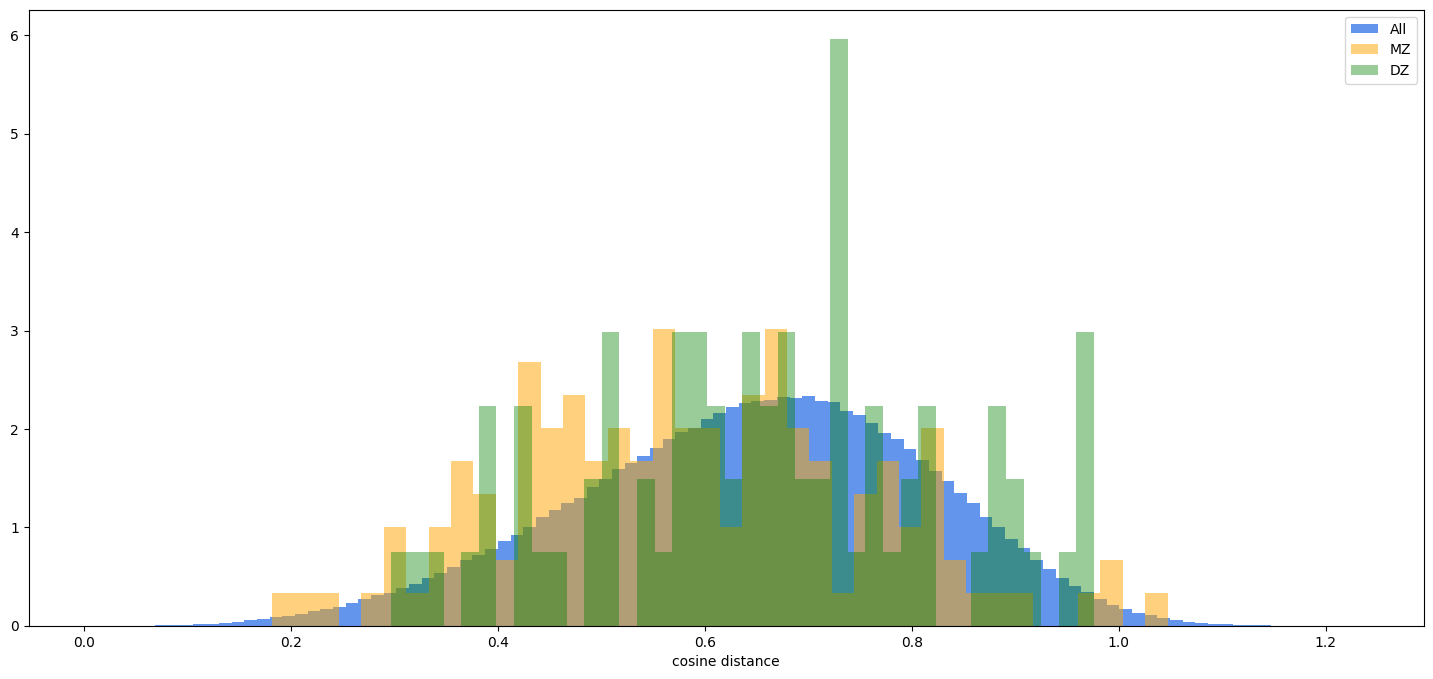

In [146]:
plt.figure(figsize=(18,8))
plt.hist(cosine_dist_overall, bins=100, density=True, label='All', color='cornflowerblue')
plt.hist(MZ_cos_dist, bins=40, density=True, alpha=0.5, label='MZ', color='orange')
plt.hist(DZ_cos_dist, bins=40, density=True, alpha=0.4, label='DZ', color='green')
plt.xlabel('cosine distance')
plt.legend()
plt.show()

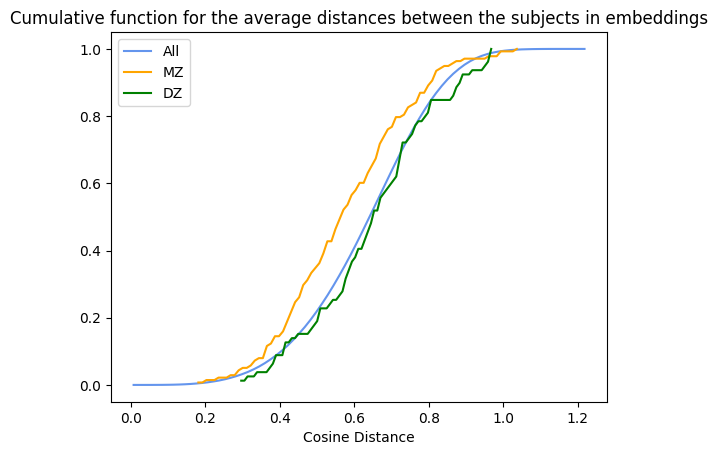

In [147]:
values_all_cos, base_all_cos = np.histogram(cosine_dist_overall, bins=80)
cumulative_all_cos = np.cumsum(values_all_cos)
values_MZ_cos, base_MZ_cos = np.histogram(MZ_cos_dist, bins=80)
cumulative_MZ_cos = np.cumsum(values_MZ_cos)
values_DZ_cos, base_DZ_cos = np.histogram(DZ_cos_dist, bins=80)
cumulative_DZ_cos = np.cumsum(values_DZ_cos)
plt.plot(base_all_cos[:-1], cumulative_all_cos/len(cosine_dist_overall), c='cornflowerblue', label='All')
plt.plot(base_MZ_cos[:-1], cumulative_MZ_cos/len(MZ_cos_dist), c='orange', label='MZ')
plt.plot(base_DZ_cos[:-1], cumulative_DZ_cos/len(DZ_cos_dist), c='green', label='DZ')
plt.title(f'Cumulative function for the average distance between the subjects in HCP embeddings')
plt.xlabel('Cosine Distance')
plt.legend()
plt.show()

In [48]:
all_cos_dist_mean = cosine_dist_overall.sum()/len(cosine_dist_overall)
all_cos_dist_mean

0.6553706780484043

In [17]:
all_eucli_dist_mean = eucli_dist_overall.sum()/len(eucli_dist_overall)
all_eucli_dist_mean

119289.95689916781

And compute the relative difference between the average distance and the specific twins' distances. 

In [18]:
(all_cos_dist_mean - MZ_mean_cos_dist)/all_cos_dist_mean

0.0650382047533552

In [122]:
(all_eucli_dist_mean - MZ_mean_eucli_dist)/all_eucli_dist_mean

0.07637577346983694

In [19]:
(all_cos_dist_mean - DZ_mean_cos_dist)/all_cos_dist_mean

0.09389005371367397

In [124]:
(all_eucli_dist_mean - DZ_mean_eucli_dist)/all_eucli_dist_mean

0.09178193913673036

## Definition of a function to compare different embedded spaces